## Modeling untuk label sentiment

In [1]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

In [3]:
import pandas as pd
csv1 = pd.read_csv('train_sentiment .csv')
csv2 = pd.read_csv('train_sentiment_2.csv')

In [4]:
merged_csv = pd.concat([csv1, csv2], ignore_index=True)

In [5]:
merged_csv

,Komentar,Penulis,Likes,Published_at,balasan,label_judol,label_sentiment
0,"['why', 'is', 'here', 'so', 'much', 'frickn', ...",@keep_dakwah24434.,0,2024-09-18T13:20:17Z,NaN,0,2
1,"['the', 'meaning', 'of', 'everything', 'you', ...",@SakiRiski-e9o,0,2024-10-08T13:17:07Z,NaN,0,2
2,"['lupa', 'main', 'dewi', 'situs', 'percaya']",@MarthaRosar,0,2024-09-18T14:32:13Z,NaN,0,2
3,"['this', 'stream', 'was', 'nice', 'but', 'im',...",@SleepyDogg,2,2024-09-19T06:16:55Z,NaN,0,2
4,"['if', 'bro', 'step', 'up', 'for', 'indonesian...",@sabda.saratustra,2,2024-09-18T23:45:35Z,NaN,0,2
...,...,...,...,...,...,...,...
1995,"['aint', 'no', 'way', 'you', 'giving', 'that',...",@MrthaAdi-o4u,2,2024-09-19T11:48:14Z,NaN,0,2
1996,"['what', 'is', 'this', 'indonesia', 'what', 'a...",@allyanich.,0,2024-09-19T07:02:51Z,NaN,0,2
1997,"['goo', 'sumatera', 'padangg']",@respectshortharry,1,2024-09-21T12:45:44Z,NaN,0,2
1998,"['we', 'backkk', 'bro', 'tomorrow']",@teguhgozlo0834,1,2024-09-18T13:22:07Z,NaN,0,2


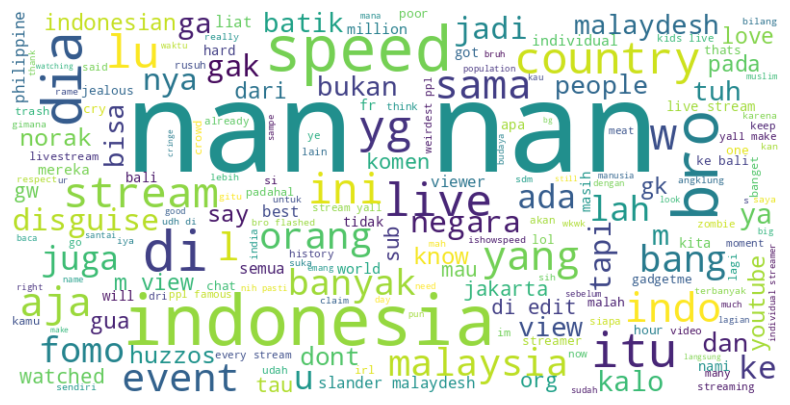

In [6]:
from wordcloud import WordCloud
all_text = ' '.join(merged_csv['balasan'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar stopwords kustom untuk Bahasa Indonesia
stop_words_id = set(stopwords.words('indonesian'))

# Fungsi preprocessing
def preprocess_text(text):
    # Tokenisasi
    tokens = word_tokenize(text)
    # Penghapusan stopwords
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words_id]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return stemmed_tokens

# Terapkan fungsi preprocessing ke kolom 'text'
merged_csv['balasan'] = merged_csv['balasan'].astype(str).apply(preprocess_text)

In [9]:
merged_csv

,Komentar,Penulis,Likes,Published_at,balasan,label_judol,label_sentiment
0,"['why', 'is', 'here', 'so', 'much', 'frickn', ...",@keep_dakwah24434.,0,2024-09-18T13:20:17Z,[nan],0,2
1,"['the', 'meaning', 'of', 'everything', 'you', ...",@SakiRiski-e9o,0,2024-10-08T13:17:07Z,[nan],0,2
2,"['lupa', 'main', 'dewi', 'situs', 'percaya']",@MarthaRosar,0,2024-09-18T14:32:13Z,[nan],0,2
3,"['this', 'stream', 'was', 'nice', 'but', 'im',...",@SleepyDogg,2,2024-09-19T06:16:55Z,[nan],0,2
4,"['if', 'bro', 'step', 'up', 'for', 'indonesian...",@sabda.saratustra,2,2024-09-18T23:45:35Z,[nan],0,2
...,...,...,...,...,...,...,...
1995,"['aint', 'no', 'way', 'you', 'giving', 'that',...",@MrthaAdi-o4u,2,2024-09-19T11:48:14Z,[nan],0,2
1996,"['what', 'is', 'this', 'indonesia', 'what', 'a...",@allyanich.,0,2024-09-19T07:02:51Z,[nan],0,2
1997,"['goo', 'sumatera', 'padangg']",@respectshortharry,1,2024-09-21T12:45:44Z,[nan],0,2
1998,"['we', 'backkk', 'bro', 'tomorrow']",@teguhgozlo0834,1,2024-09-18T13:22:07Z,[nan],0,2


In [124]:
from gensim.models import Word2Vec
# Train Word2Vec model
modelw2v = Word2Vec(merged_csv['balasan'], vector_size=200, window=5, min_count=1, workers=4)

In [125]:
import numpy as np
def average_vector(comment, model, vector_size):
    vectors = [model.wv[word] for word in comment if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [126]:
vector_size = modelw2v.vector_size
X = np.array([average_vector(comment, modelw2v, vector_size) for comment in merged_csv['balasan']])

In [127]:
from sklearn.model_selection import train_test_split
y = merged_csv['label_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
merged_csv['balasan'] = merged_csv['balasan'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)

# Fit dan transform pada kolom cleaned_message
tfidf = TfidfVectorizer(max_features=500)
x_tfidf = tfidf.fit_transform(merged_csv['balasan']).toarray()

# Label
y = merged_csv['label_sentiment']

# Split data menjadi train dan test
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size=0.1, random_state=42)

# Tampilkan bentuk data setelah TF-IDF
X_train_tfidf.shape, X_test_tfidf.shape, len(y_train_tfidf), len(y_test_tfidf)

((1800, 500), (200, 500), 1800, 200)

# SVM (WOrd2Vec)

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_svm = svm_model.predict(X_test)

# Evaluasi hasil prediksi
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Menampilkan classification report untuk detail lebih lanjut
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       0.00      0.00      0.00         3
           2       1.00      0.97      0.99       187

    accuracy                           0.96       200
   macro avg       0.52      0.66      0.57       200
weighted avg       0.96      0.96      0.96       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


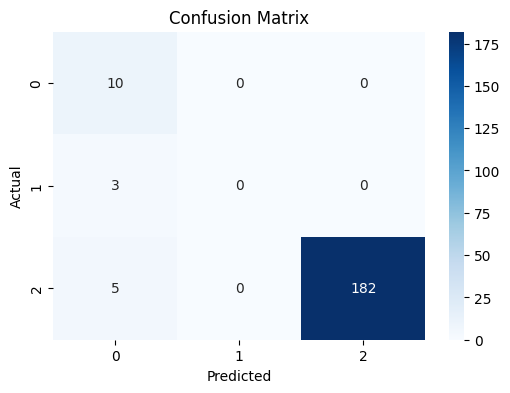

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# SVM (TF-IDF)

In [131]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train_tfidf)

# Prediksi pada data test
y_pred_svm_tfidf = svm_model.predict(X_test_tfidf)

# Evaluasi hasil prediksi
accuracy = accuracy_score(y_test_tfidf, y_pred_svm_tfidf)
print(f"Accuracy: {accuracy}")

# Menampilkan classification report untuk detail lebih lanjut
print(classification_report(y_test_tfidf, y_pred_svm_tfidf))


Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.43      1.00      0.60         3
           2       0.99      0.97      0.98       187

    accuracy                           0.95       200
   macro avg       0.67      0.86      0.73       200
weighted avg       0.97      0.95      0.96       200



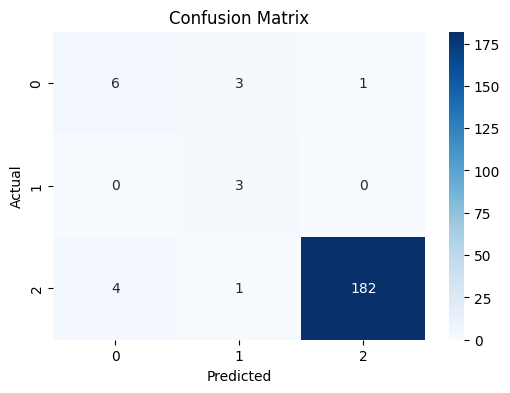

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test_tfidf, y_pred_svm_tfidf)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest(Word2Vec)

In [148]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0:2,1:15,2:1})
rf_classifier.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.20      0.33      0.25         3
           2       1.00      0.98      0.99       187

    accuracy                           0.95       200
   macro avg       0.59      0.67      0.63       200
weighted avg       0.97      0.95      0.96       200



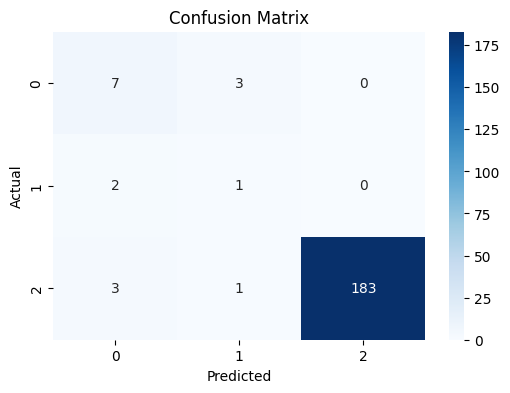

In [140]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2'], yticklabels=['0', '1','2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest (TF-IDF)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train_tfidf, y_train_tfidf)

# Prediksi dan evaluasi
y_pred_tfidf = rf_classifier.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test_tfidf, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf))

Accuracy: 0.935
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.15      0.67      0.25         3
           2       0.99      0.97      0.98       187

    accuracy                           0.94       200
   macro avg       0.63      0.65      0.55       200
weighted avg       0.97      0.94      0.95       200



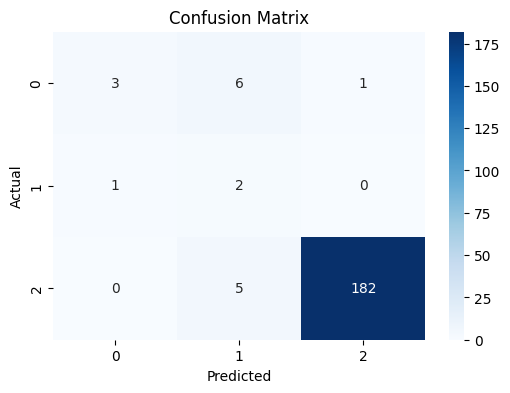

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test_tfidf, y_pred_tfidf)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1','2'], yticklabels=['0', '1','2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [143]:
pred_data = pd.read_csv('test_sentiment.csv')

In [144]:
pred_data['balasan'] = pred_data['balasan'].astype(str).apply(preprocess_text)

In [145]:
vector_size = modelw2v.vector_size
pred_vec = np.array([average_vector(comment, modelw2v, vector_size) for comment in pred_data['balasan']])

In [146]:
pred_data['balasan']

,balasan
0,"[yuk, yuk, m, likes]"
1,[nan]
2,[nan]
3,[nan]
4,[nan]
...,...
32397,[nan]
32398,[nan]
32399,[nan]
32400,[nan]


In [149]:
hasil = rf_classifier.predict(pred_vec)

In [150]:
hasil.tolist()

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [151]:
pred_data['label_sentiment'] = hasil.tolist()

In [152]:
pred_data['label_sentiment'].value_counts()

,count
label_sentiment,
2,32062
0,236
1,104


In [153]:
pred_data

,Komentar,Penulis,Likes,Published_at,balasan,label_judol,label_sentiment
0,"['tembus', 'jt', 'views', 'god', 'job', 'indon...",@RizqiAkbar-ky3fw,2,2024-09-19T10:17:31Z,"[yuk, yuk, m, likes]",0,2
1,"['enjoy', 'indonesian', 'zombies']",@shosha7463,0,2024-09-19T17:50:19Z,[nan],0,2
2,"['i', 'was', 'here']",@RyuuLion,0,2024-09-18T13:22:52Z,[nan],0,2
3,"['indonesia', 'is', 'a', 'relaxed', 'but', 'cr...",@jefrisaputra1887,0,2024-09-19T14:47:58Z,[nan],0,2
4,"['gelo', 'dangdut']",@Kop078,0,2024-09-20T13:07:27Z,[nan],0,2
...,...,...,...,...,...,...,...
32397,"['bro', 'go', 'to', 'east', 'indonesia']",@dyracoffee3402,0,2024-09-18T17:47:30Z,[nan],0,2
32398,"['if', 'u', 'still', 'in', 'indonesia', 'you',...",@AbdulRahman-bv9nw,0,2024-09-20T04:40:09Z,[nan],0,2
32399,"['try', 'it', 'in', 'mexico', 'indonesia', 'is...",@LD_GAMING,1,2024-09-19T08:17:25Z,[nan],0,2
32400,"['anak', 'adopsi', 'cr', 'httpsyoutubecomshort...",@DefAja-kk9ny,0,2024-09-20T12:03:22Z,[nan],0,2


In [154]:
pred_data.to_csv('hasil_final.csv', index=False)

## Analisis Hasil Final

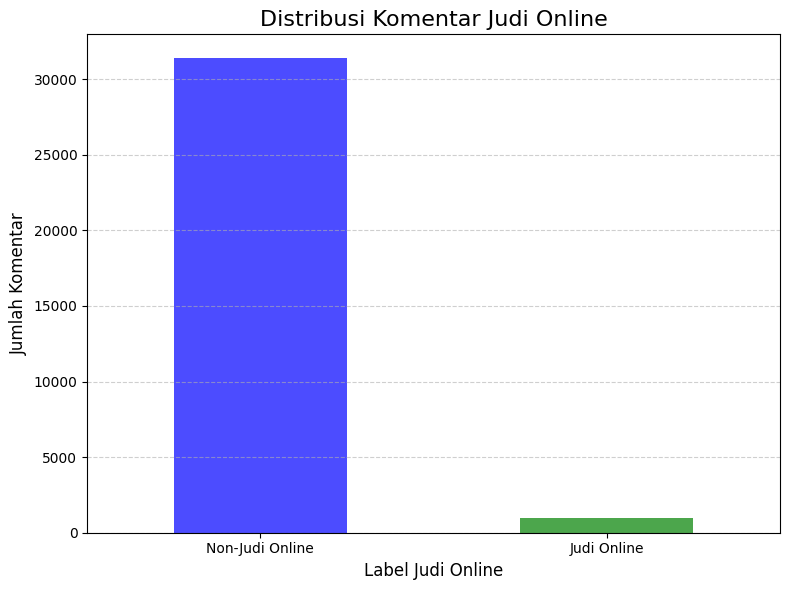

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'hasil_final.csv'
data = pd.read_csv(file_path)

# Distribusi sentimen
sentiment_counts = data['label_judol'].value_counts()

# Plot distribusi sentimen
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Distribusi Komentar Judi Online', fontsize=16)
plt.xlabel('Label Judi Online', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(ticks=range(len(sentiment_counts)), labels=['Non-Judi Online', 'Judi Online'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [2]:
data['label_judol'].value_counts()

,count
label_judol,
0,31403
1,999


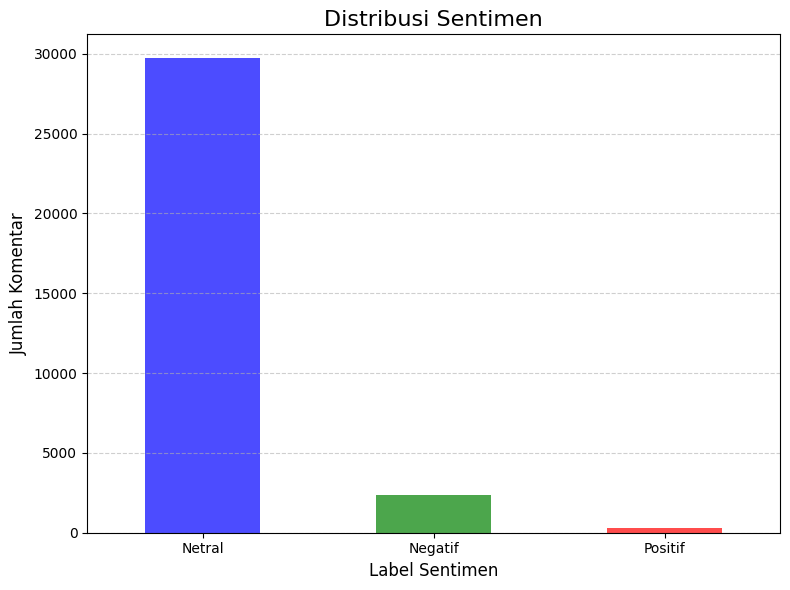

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'hasil_final.csv'
data = pd.read_csv(file_path)

# Distribusi sentimen
sentiment_counts = data['label_sentiment'].value_counts()

# Plot distribusi sentimen
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Distribusi Sentimen', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(ticks=range(len(sentiment_counts)), labels=['Netral', 'Negatif', 'Positif'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [4]:
data['label_sentiment'].value_counts()

,count
label_sentiment,
2,29731
0,2345
1,326


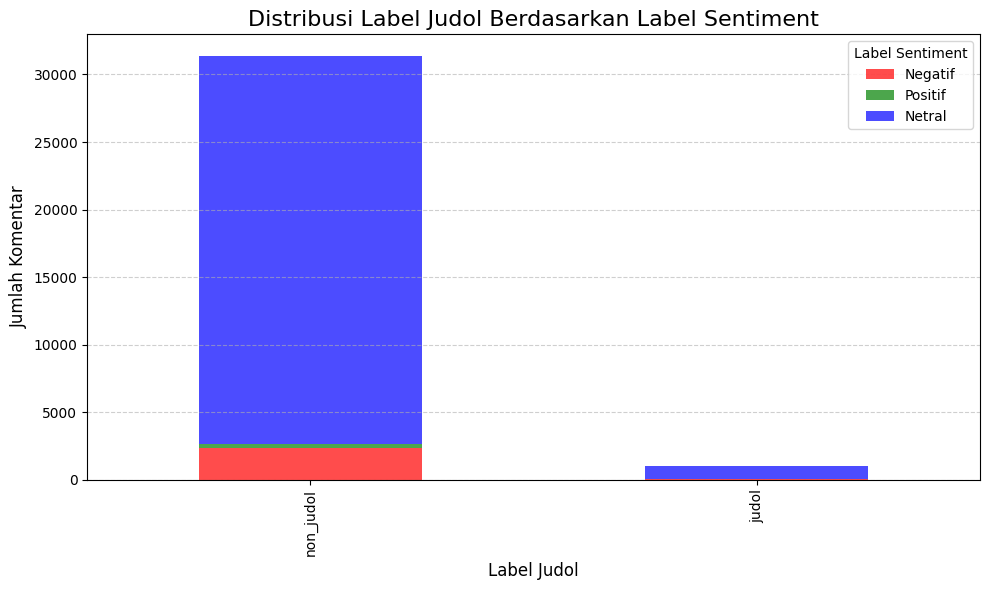

In [5]:
# Group data by label_judol and label_sentiment
judol_sentiment_counts = data.groupby(['label_judol', 'label_sentiment']).size().unstack()

# Update label names for better readability
judol_sentiment_counts.index = judol_sentiment_counts.index.map({0: 'non_judol', 1: 'judol'})

# Plot visualisasi label_judol berdasarkan label_sentiment with updated labels
judol_sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green', 'blue'], alpha=0.7)
plt.title('Distribusi Label Judol Berdasarkan Label Sentiment', fontsize=16)
plt.xlabel('Label Judol', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.legend(title='Label Sentiment', labels=['Negatif', 'Positif', 'Netral'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [6]:
judol_sentiment_counts

label_sentiment,0,1,2
label_judol,,,
non_judol,2319,322,28762
judol,26,4,969


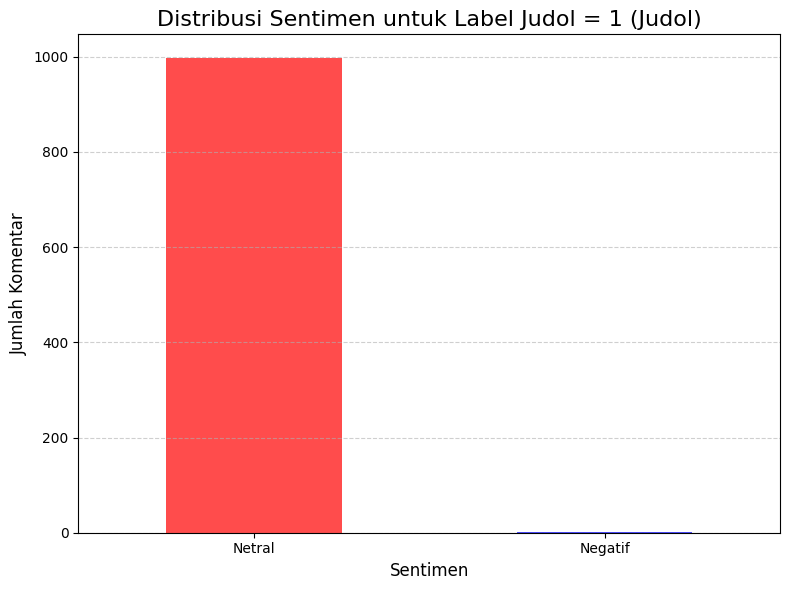

In [158]:
# Redefine the filtered sentiment counts for label_judol = 1
judol_sentiment_counts_filtered = data[data['label_judol'] == 1]['label_sentiment'].value_counts()

# Map label_sentiment values to descriptive labels
sentiment_labels = {0: 'Negatif', 1: 'Positif', 2: 'Netral'}
judol_sentiment_counts_filtered.index = judol_sentiment_counts_filtered.index.map(sentiment_labels)

# Plot the updated visualization
plt.figure(figsize=(8, 6))
judol_sentiment_counts_filtered.plot(kind='bar', color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Distribusi Sentimen untuk Label Judol = 1 (Judol)', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


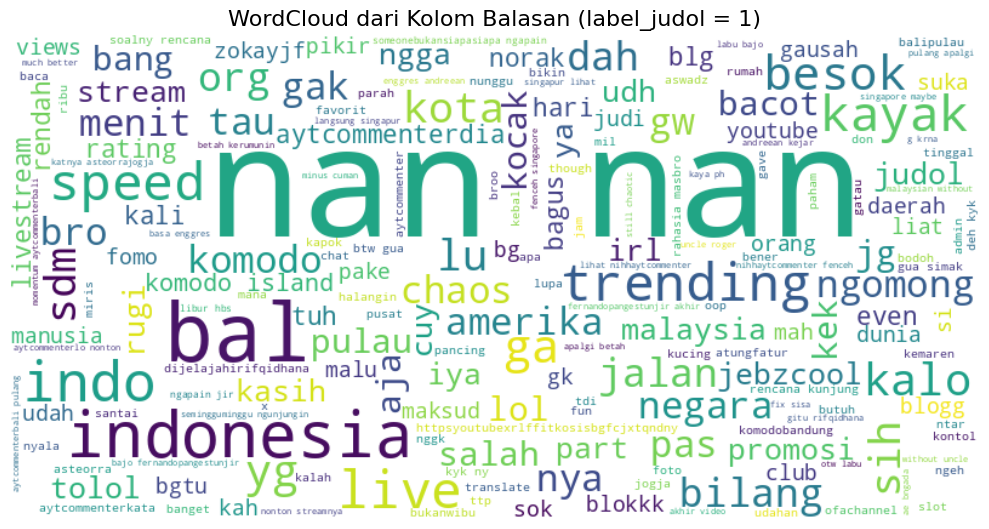

In [166]:
# Re-import necessary libraries due to state reset
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'hasil_final.csv'
data = pd.read_csv(file_path)

data['balasan'] = data['balasan'].str.replace(r"'", "", regex=True)
# Filter data untuk label_judol = 0
balasan_non_judol = data[data['label_judol'] == 1]['balasan']

# Gabungkan semua teks dalam kolom 'balasan' menjadi satu string
text_non_judol = ' '.join(balasan_non_judol.dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_non_judol)

# Visualisasi word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom Balasan (label_judol = 1)', fontsize=16)
plt.tight_layout()
plt.show()


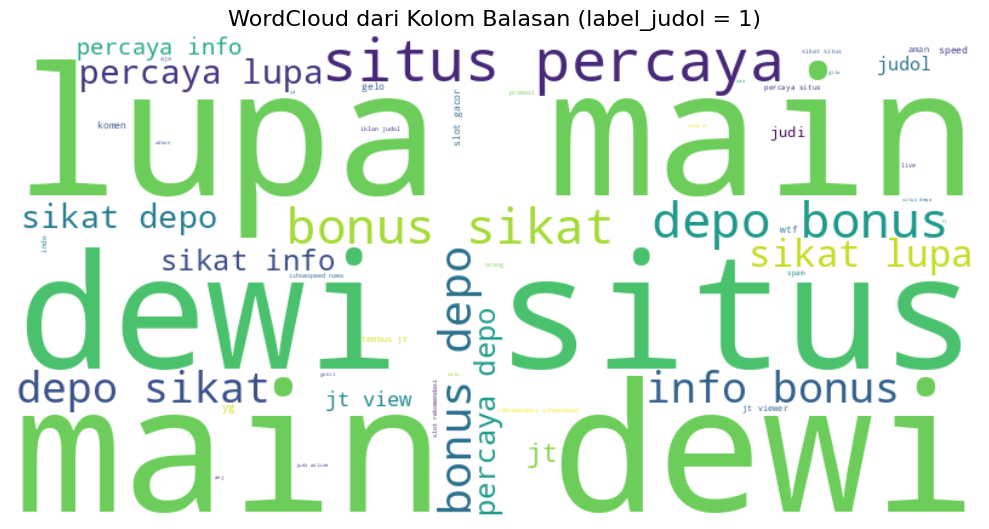

In [165]:
# Re-import necessary libraries due to state reset
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'hasil_final.csv'
data = pd.read_csv(file_path)
data['Komentar'] = data['Komentar'].str.replace(r"'", "", regex=True)

# Filter data untuk label_judol = 0
balasan_non_judol = data[data['label_judol'] == 1]['Komentar']

# Gabungkan semua teks dalam kolom 'balasan' menjadi satu string
text_non_judol = ' '.join(balasan_non_judol.dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_non_judol)

# Visualisasi word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kolom Balasan (label_judol = 1)', fontsize=16)
plt.tight_layout()
plt.show()
